<a href="https://colab.research.google.com/github/suryakantk94/ToTheTop_AI-hackathon/blob/main/ToTheTop_AI_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Convolutional Neural Network

# Importing the libraries
import os
import glob
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
import pandas as pd
import keras
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization

In [2]:
train = "/content/drive/MyDrive/trainzip/training"
test = "/content/drive/MyDrive/testzip"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count 

In [5]:
train_samples =get_files(train)
num_classes=len(glob.glob(train+"/*"))
test_samples=get_files(test) # For testing i took only few samples from unseen data. we can evaluate using validation data which is part of train data.
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

2 Classes
5875 Train images
98 Test images


In [6]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/trainzip/training',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test,
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')



Found 5875 images belonging to 2 classes.
Found 98 images belonging to 1 classes.


In [8]:
# CNN building.
input_shape=(256,256,3)

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 23104)             0

In [9]:
# Model building to get trained with parameters.
import tensorflow

opt=tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps = len(test_set),
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
184/184 [==============================] - 2539s 14s/step - loss: 0.4587 - accuracy: 0.8199 - val_loss: 3.4780 - val_accuracy: 0.5816
Epoch 2/50
184/184 [==============================] - 94s 513ms/step - loss: 0.2251 - accuracy: 0.9185 - val_loss: 7.3351 - val_accuracy: 0.5918
Epoch 3/50
184/184 [==============================] - 96s 521ms/step - loss: 0.1749 - accuracy: 0.9392 - val_loss: 8.8934 - val_accuracy: 0.6020
Epoch 4/50
184/184 [==============================] - 94s 513ms/step - loss: 0.1505 - accuracy: 0.9511 - val_loss: 11.7779 - val_accuracy: 0.5918
Epoch 5/50
184/184 [==============================] - 95s 516ms/step - loss: 0.1309 - accuracy: 0.9547 - val_loss: 10.5349 - val_accuracy: 0.5714
Epoch 6/50
184/184 [==============================] - 95s 518ms/step - loss: 0.1021 - accuracy: 0.9656 - val_loss: 14.6189 - val_accuracy: 0.5510
Epoch 7/50
184/184 [==============================] - 95s 514ms/step - loss: 0.1048 - accuracy: 0.9654 - val_loss: 14.8598 - va

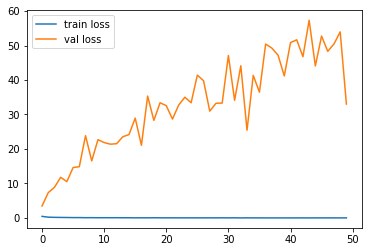

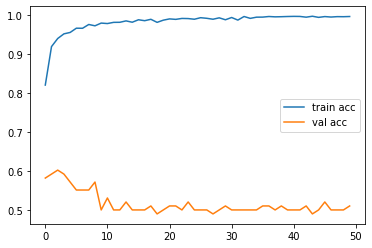

<Figure size 432x288 with 0 Axes>

In [10]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [11]:
model.save("trained_model_1.h5")

In [12]:
import cv2
from keras.models import load_model
from PIL import Image

trained_model = load_model("trained_model_1.h5")

In [14]:
#sample output format

import random
import json
# from utils.io import write_json

def test_model(i):
  img_pth = test + '/test/{}'.format(i)
  print("Testing =>", img_pth)
  
  img = cv2.imread(img_pth)
  img = cv2.resize(img, (256,256))

  newimg = np.asarray(img)
  pixels = newimg.astype('float32')
  pixels /= 255.0
  # print(pixels.shape)

  pixels = np.expand_dims(pixels, axis=0)
  ans = model.predict(pixels)
  ans = np.argmax(ans,axis=1)[0]

  return ans

def write_json(filename, result):
    with open(filename, 'w') as outfile:
        json.dump(result, outfile)

def read_json(filename):
    with open(filename, 'r') as outfile:
        data =  json.load(outfile)
    return data

def generate_sample_file(filename):
    res = {}
    for i in range(1,99):
        test_set = str(i) + '.jpg'
        # print(test_set)
        label = test_model(test_set)
        res[test_set] = int(label)

    write_json(filename, res)

if __name__ == '__main__':
    generate_sample_file('./ToTheTop_final_result.json')


Testing => /content/drive/MyDrive/testzip/test/1.jpg
Testing => /content/drive/MyDrive/testzip/test/2.jpg
Testing => /content/drive/MyDrive/testzip/test/3.jpg
Testing => /content/drive/MyDrive/testzip/test/4.jpg
Testing => /content/drive/MyDrive/testzip/test/5.jpg
Testing => /content/drive/MyDrive/testzip/test/6.jpg
Testing => /content/drive/MyDrive/testzip/test/7.jpg
Testing => /content/drive/MyDrive/testzip/test/8.jpg
Testing => /content/drive/MyDrive/testzip/test/9.jpg
Testing => /content/drive/MyDrive/testzip/test/10.jpg
Testing => /content/drive/MyDrive/testzip/test/11.jpg
Testing => /content/drive/MyDrive/testzip/test/12.jpg
Testing => /content/drive/MyDrive/testzip/test/13.jpg
Testing => /content/drive/MyDrive/testzip/test/14.jpg
Testing => /content/drive/MyDrive/testzip/test/15.jpg
Testing => /content/drive/MyDrive/testzip/test/16.jpg
Testing => /content/drive/MyDrive/testzip/test/17.jpg
Testing => /content/drive/MyDrive/testzip/test/18.jpg
Testing => /content/drive/MyDrive/tes